In [169]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

path = "/Users/xtarx/Documents/TUM/4th/MLMA/ex3/04_RandomForests/"
h = .02  # step size in the mesh

In [92]:
def read_file(file_name,y_index):
    data = pd.read_csv(path+file_name)
    y=data[data.columns[y_index]].as_matrix()
    x=data.drop(data.columns[[y_index]], axis=1).as_matrix()
    return  x,y

In [93]:
twist_x, twist_y = read_file("TwistData.csv",2)

In [94]:
spiral_x, spiral_y = read_file("SpiralData.csv", 2)

In [132]:
tube_x, tube_y = read_file("TuberculosisData.csv", -1)

In [158]:
tube_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [110]:
def compare(names, classifiers, datasets,testsize=.4):
    figure = plt.figure(figsize=(27, 9))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=testsize, random_state=42)
    
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    
        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
    
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
    
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       alpha=0.6)
    
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
    
    plt.tight_layout()
    plt.show()

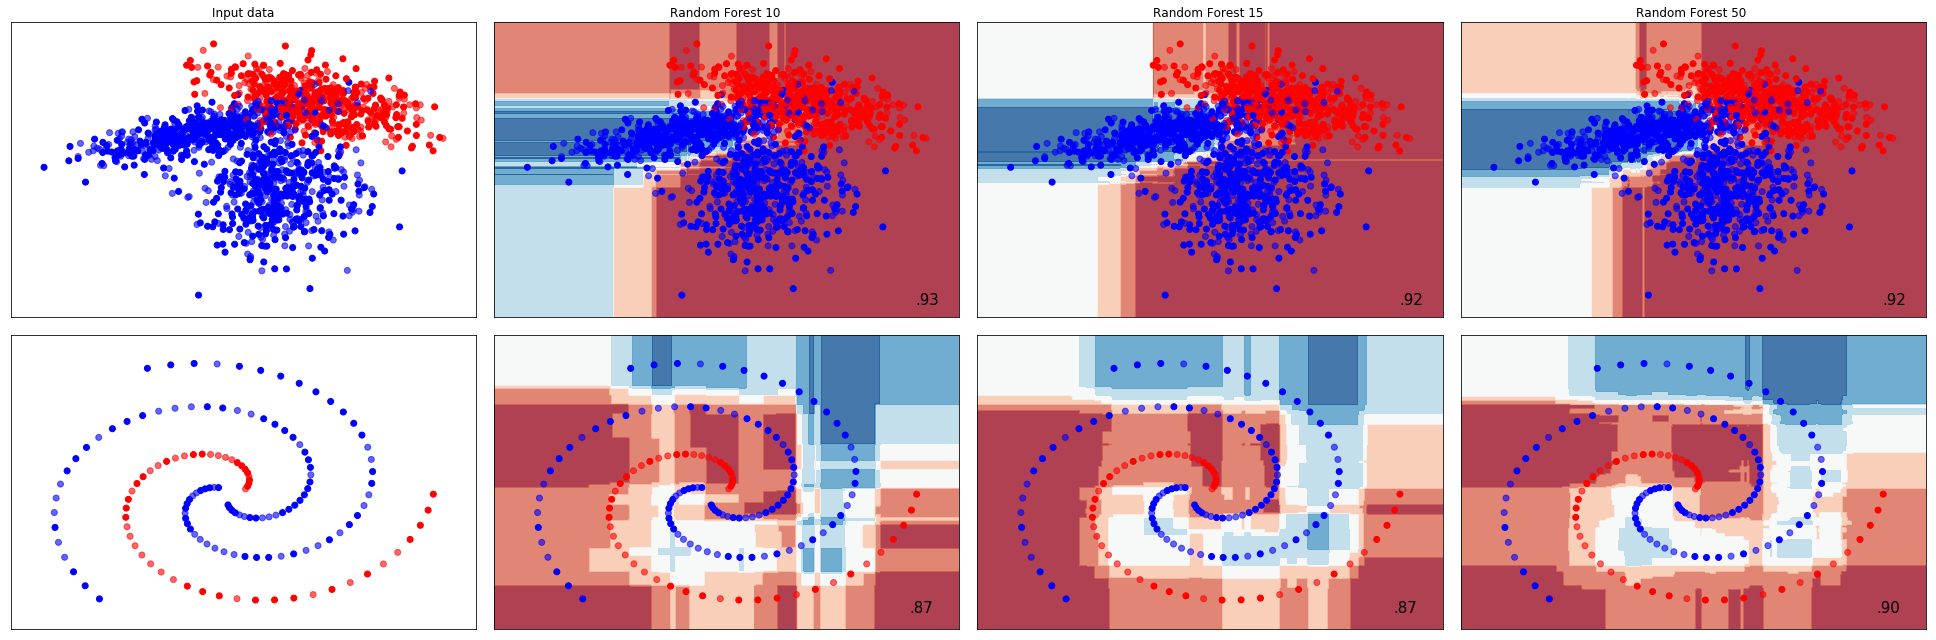

In [111]:
names = ["Random Forest 10 ","Random Forest 15 ","Random Forest 50 "]
classifiers = [
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),RandomForestClassifier(max_depth=5, n_estimators=15, max_features=1),
    RandomForestClassifier(max_depth=5, n_estimators=50, max_features=1),]

twist=(twist_x,twist_y)
spiral=(spiral_x,spiral_y)
datasets = [twist,spiral]

compare(names,classifiers,datasets)

c. For fixed number of trees (say, 10) vary the depth of the classifiers from 2,3,..8. Plot similar curves as 1(b).

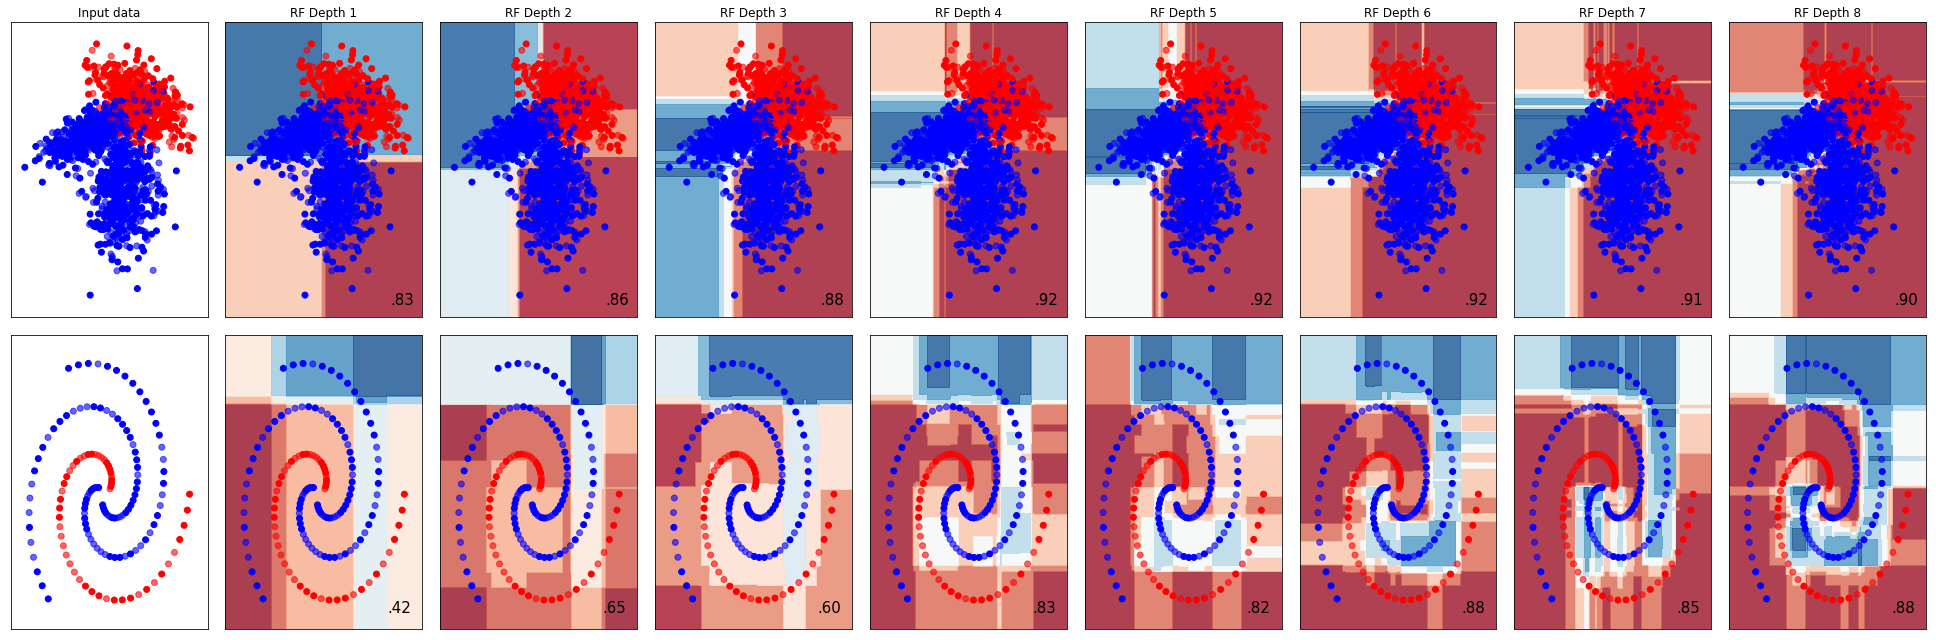

In [165]:
names = []
classifiers = []
#"RF Dept 10 "
#RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
twist = (twist_x, twist_y)
spiral = (spiral_x, spiral_y)
tuber_dataset = (tube_x, tube_y)

datasets = [twist, spiral]

for n in range(1, 9):
    names.append("RF Depth " + str(n))
    classifiers.append(RandomForestClassifier(max_depth=n, n_estimators=10, max_features=1)
                       )

compare(names, classifiers, datasets)

For Tuberculosis data: Learn random forest classifiers. Perform k = 5 folded cross-validation, i.e., split data into 5 folds and use 4 folds for training and 1 fold for testing.

In [179]:
names = ["Random Forest", "SVM", "logistic Regression"]
classifiers = [RandomForestClassifier(max_depth=4, n_estimators=20, max_features=1), SVC(kernel="rbf", C=1),
               LogisticRegression()]  # tube_ds={"X_train":X_train,"X_test":X_test,"y_train":y_train,"y_test":y_test}
# datasets = [tube_ds]
tuber_dataset = (tube_x, tube_y)
datasets = [tuber_dataset]
task2(tube_x,tube_y,names,classifiers)

Random Forest
{'Precision': 0.75384615384615383, 'Accuracy': 0.72180451127819545, 'Recall': 0.69999999999999996, 'FPR': 0.25396825396825395}
SVM
{'Precision': 1.0, 'Accuracy': 0.48120300751879697, 'Recall': 0.014285714285714285, 'FPR': 0.0}
logistic Regression
{'Precision': 0.77631578947368418, 'Accuracy': 0.78947368421052633, 'Recall': 0.84285714285714286, 'FPR': 0.26984126984126988}


In [178]:
def get_metrics(labels, predicted_labels):
    metrics = {}
    score = []
    metrics["Accuracy"] = accuracy_score(labels, predicted_labels)
    metrics["Recall"] = recall_score(labels, predicted_labels)
    metrics["Precision"] = precision_score(labels, predicted_labels)
    cm = confusion_matrix(labels, predicted_labels)
    tn = float(cm[1][1]) / np.sum(cm[1])
    metrics["FPR"] = 1 - tn

    return metrics

def task2(X, y, names, classifiers):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    score = []

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pr = clf.predict(X_test)
    print(name)
    print(get_metrics(y_test, y_pr))